## Import Libraries

In [75]:
# Data Manipulation Libraries
import pandas as pd 

# Data Visualization Libraries  
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 

# Machine Learning Libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Others  
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

## Data Collection

In [77]:
df = pd.read_csv(r"H:\Programming\Dataset\Machine Learning\Placement (1).csv")
df.head()

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0


## Data Understanding

In [79]:
print("Info: ")
print(df.info())
print("\nNaN values: ")
print(df.isnull().sum())
print("\nDuplicates: ")
print(df.duplicated().sum())

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  100 non-null    int64  
 1   CGPA        100 non-null    float64
 2   IQ          100 non-null    int64  
 3   Placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.3 KB
None

NaN values: 
Student_ID    0
CGPA          0
IQ            0
Placement     0
dtype: int64

Duplicates: 
0


## Data Cleaning 

In [81]:
df.drop(columns=['Student_ID'], inplace=True) 
df.head(3)

,CGPA,IQ,Placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0


## Exploratory Data Analysis (EDA)

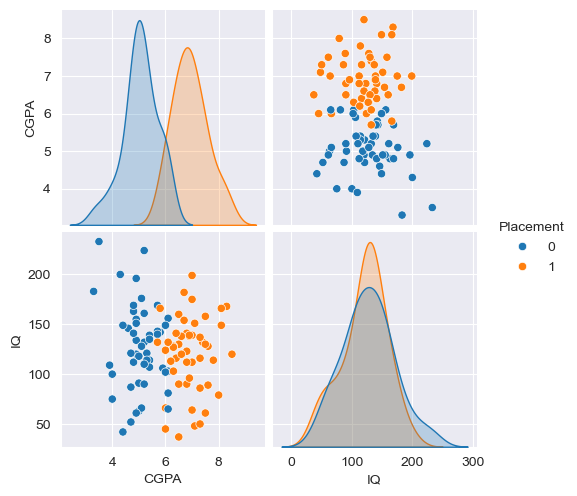

In [83]:
sns.pairplot(df, hue="Placement") 
plt.show()

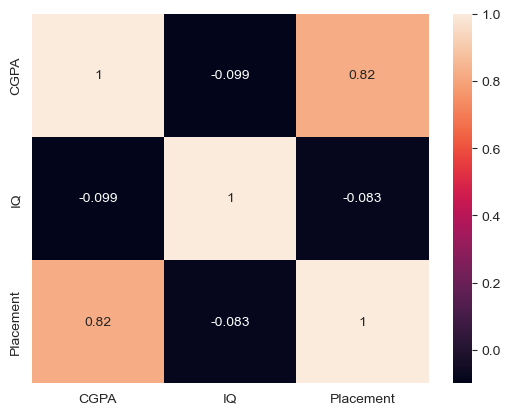

In [84]:
sns.heatmap(df.corr(), annot=True)
plt.show()

## Modeling 

In [86]:
x = df.iloc[:,:-1]
y = df['Placement']

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


### LogisticRegression

In [89]:
lor = LogisticRegression()
lor.fit(x_train, y_train)

LogisticRegression()

In [90]:
print(f"Model Accuracy: {lor.score(x_test, y_test)*100:.2f} %")

Model Accuracy: 85.00 %


# Confusion Matrix

In [92]:
y_pred = lor.predict(x_test)
cf = confusion_matrix(y_test, y_pred)
cf

array([[9, 1],
       [2, 8]], dtype=int64)

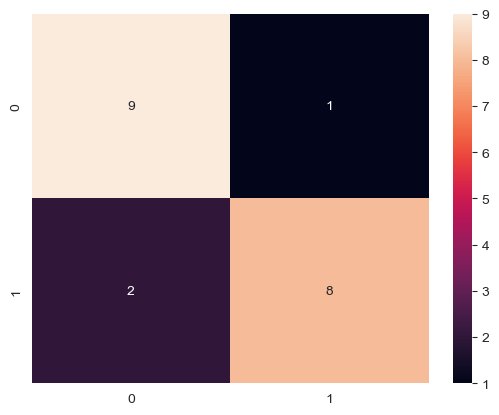

In [93]:
sns.heatmap(cf, annot=True) 
plt.show()

# Scores

In [95]:
print(f"Precision Score: {precision_score(y_test, y_pred)*100:.2f}%")


Precision Score: 88.89%


In [96]:
print(f"Recall Score: {recall_score(y_test, y_pred)*100:.2f}%")


Recall Score: 80.00%


In [97]:
print(f"F1 Score: {f1_score(y_test, y_pred)*100:.2f}%")


F1 Score: 84.21%


# Result

In [99]:
ps = round(precision_score(y_test, y_pred, zero_division=0)*100,2)
rs = round(recall_score(y_test, y_pred, zero_division=0)*100,2)
f1 = round(f1_score(y_test, y_pred, zero_division=0)*100,2)

accuracy = {
    "Precision Score": [ps],
    "Recall Score": [rs],
    "F1 Score": [f1]
}

result = pd.DataFrame(accuracy)
result

,Precision Score,Recall Score,F1 Score
0,88.89,80.0,84.21


# Pro tip (industry standard)

In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.89      0.80      0.84        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



In [102]:
import pandas as pd
from sklearn.metrics import classification_report

report_dict = classification_report(
    y_test,
    y_pred,
    output_dict=True,
    zero_division=0
)

result = pd.DataFrame(report_dict).transpose()
result


,precision,recall,f1-score,support
0,0.818182,0.90,0.857143,10.00
1,0.888889,0.80,0.842105,10.00
accuracy,0.850000,0.85,0.850000,0.85
macro avg,0.853535,0.85,0.849624,20.00
weighted avg,0.853535,0.85,0.849624,20.00


# Best Model Selection with Confusion Matrix

In [104]:
df.columns

Index(['CGPA', 'IQ', 'Placement'], dtype='object')


 Best Model: SGD Classifier
Accuracy      95.0
Precision    100.0
Recall        90.0
F1 Score      95.0
Name: SGD Classifier, dtype: float64


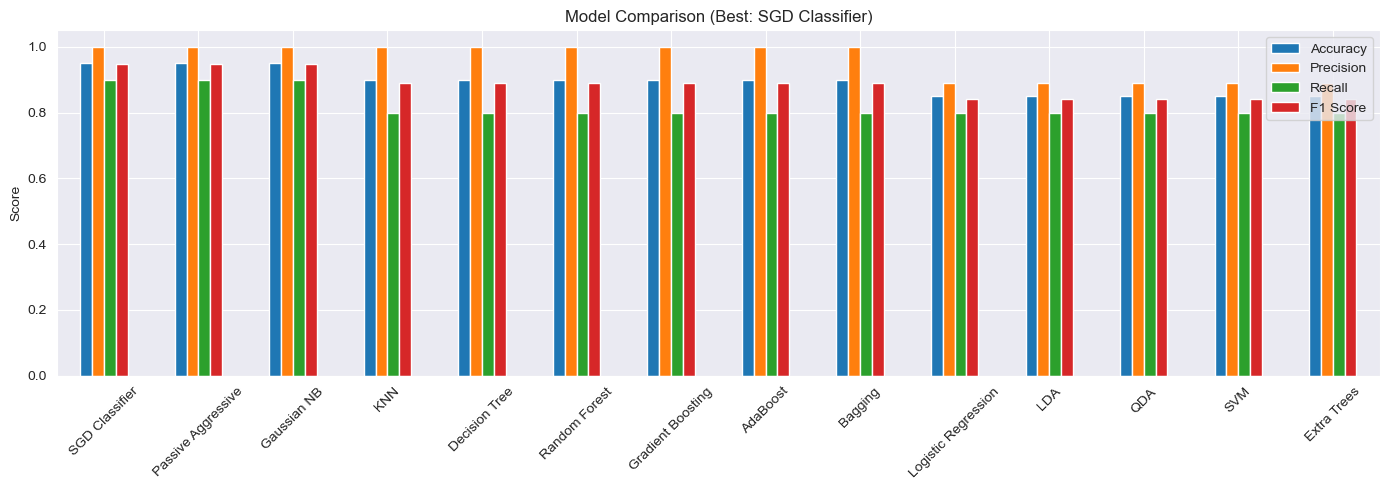

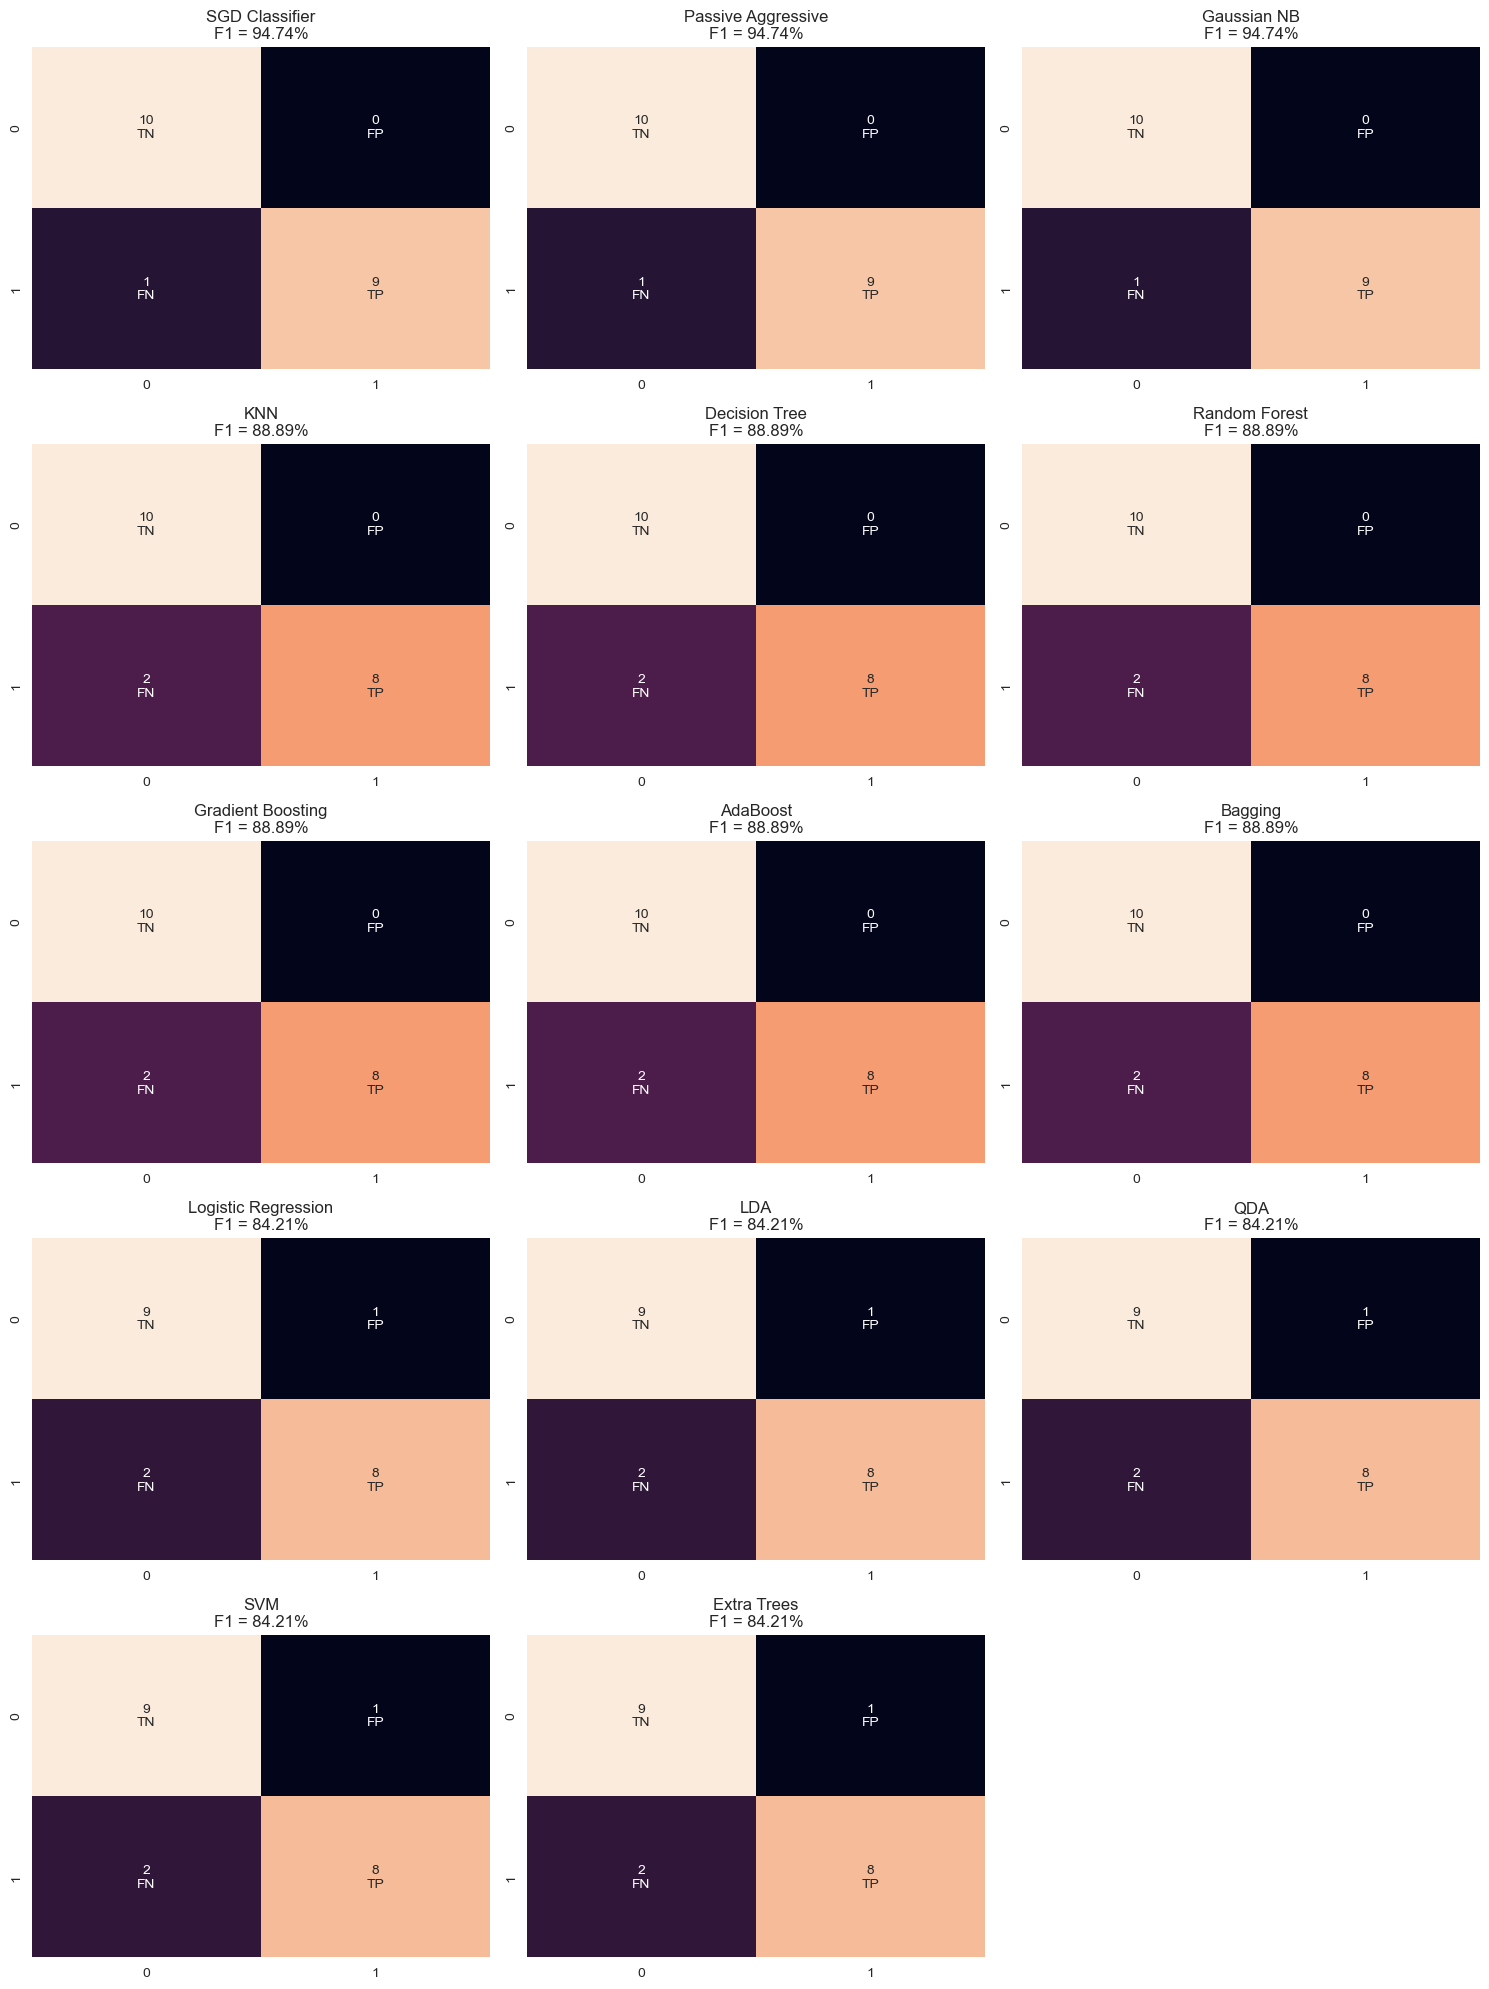


 Model Performance Summary


,Accuracy,Precision,Recall,F1 Score
SGD Classifier,95.0,100.00,90.0,94.74
Passive Aggressive,95.0,100.00,90.0,94.74
Gaussian NB,95.0,100.00,90.0,94.74
KNN,90.0,100.00,80.0,88.89
Decision Tree,90.0,100.00,80.0,88.89
Random Forest,90.0,100.00,80.0,88.89
Gradient Boosting,90.0,100.00,80.0,88.89
AdaBoost,90.0,100.00,80.0,88.89
Bagging,90.0,100.00,80.0,88.89
Logistic Regression,85.0,88.89,80.0,84.21



 Error Breakdown (Sorted by FN)


,TN,FP,FN,TP
SGD Classifier,10,0,1,9
Passive Aggressive,10,0,1,9
Gaussian NB,10,0,1,9
Logistic Regression,9,1,2,8
LDA,9,1,2,8
QDA,9,1,2,8
SVM,9,1,2,8
KNN,10,0,2,8
Decision Tree,10,0,2,8
Random Forest,10,0,2,8


In [105]:
# ======================================================
# 1. IMPORT LIBRARIES
# ======================================================
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Linear / Probabilistic
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Distance / Margin
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Tree / Ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier
)

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

sns.set_style("darkgrid")


# ======================================================
# 2. FEATURES & TARGET
# ======================================================
X = df.iloc[:, :-1]
y = df["Placement"]      # must be binary (0/1)


# ======================================================
# 3. TRAIN–TEST SPLIT
# ======================================================
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)



# ======================================================
# 4. MODEL DEFINITIONS (AUTO SCALING)
# ======================================================
models = {

    # ---------- LINEAR / PROBABILISTIC ----------
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(
            max_iter=1000,
            solver="liblinear",
            random_state=42
        ))
    ]),

    "SGD Classifier": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SGDClassifier(
            max_iter=2000,
            tol=1e-3,
            random_state=42
        ))
    ]),

    "Passive Aggressive": Pipeline([
        ("scaler", StandardScaler()),
        ("model", PassiveAggressiveClassifier(
            max_iter=1000,
            random_state=42
        ))
    ]),

    "LDA": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LinearDiscriminantAnalysis())
    ]),

    "QDA": QuadraticDiscriminantAnalysis(),

    "Gaussian NB": GaussianNB(),

    # ---------- DISTANCE / MARGIN ----------
    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVC(
            probability=True,
            random_state=42
        ))
    ]),

    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsClassifier())
    ]),

    # ---------- TREE / ENSEMBLE ----------
    "Decision Tree": DecisionTreeClassifier(random_state=42),

    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ),

    "Extra Trees": ExtraTreesClassifier(
        n_estimators=200,
        random_state=42
    ),

    "Gradient Boosting": GradientBoostingClassifier(random_state=42),

    "AdaBoost": AdaBoostClassifier(random_state=42),

    "Bagging": BaggingClassifier(random_state=42)
}



# ======================================================
# 5. TRAINING & EVALUATION
# ======================================================
metrics_store = {}
confusion_store = {}
pred_store = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    pred_store[name] = y_pred

    metrics_store[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1 Score": f1_score(y_test, y_pred, zero_division=0)
    }

    confusion_store[name] = confusion_matrix(y_test, y_pred)


# ======================================================
# 6. RESULTS TABLE (SORTED BY F1)
# ======================================================
results_df = (
    pd.DataFrame(metrics_store)
    .T
    .sort_values(by="F1 Score", ascending=False)
)

best_model_name = results_df.index[0]

print(f"\n Best Model: {best_model_name}")
print(results_df.loc[best_model_name].round(2)*100)


# ======================================================
# 7. METRIC COMPARISON PLOT
# ======================================================
results_df.plot(kind="bar", figsize=(14, 5))
plt.title(f"Model Comparison (Best: {best_model_name})")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("ss.png")
plt.show()


# ======================================================
# 8. CONFUSION MATRIX GRID
# ======================================================
sorted_models = results_df.index.tolist()
n_cols = 3
n_rows = math.ceil(len(sorted_models) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, model_name in enumerate(sorted_models):
    cm = confusion_store[model_name]
    tn, fp, fn, tp = cm.ravel()

    labels = [
        [f"{tn}\nTN", f"{fp}\nFP"],
        [f"{fn}\nFN", f"{tp}\nTP"]
    ]

    sns.heatmap(cm, annot=labels, fmt="", cbar=False, ax=axes[i])
    axes[i].set_title(
        f"{model_name}\nF1 = {results_df.loc[model_name, 'F1 Score']*100:.2f}%"
    )

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


# ======================================================
# 9. CONFUSION MATRIX ERROR TABLE
# ======================================================
cm_df = pd.DataFrame({
    model: dict(zip(["TN", "FP", "FN", "TP"], cm.ravel()))
    for model, cm in confusion_store.items()
}).T

cm_df = cm_df.sort_values(by="FN", ascending=True)


# ======================================================
# 10. FINAL OUTPUT
# ======================================================
print("\n Model Performance Summary")
display(results_df.round(4)*100)

print("\n Error Breakdown (Sorted by FN)")
display(cm_df)
